In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# Leer el set de datos y consultar información básica
df = pd.read_csv('digitos.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
# Consultar los primeros registros del set de datos
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

<Axes: >

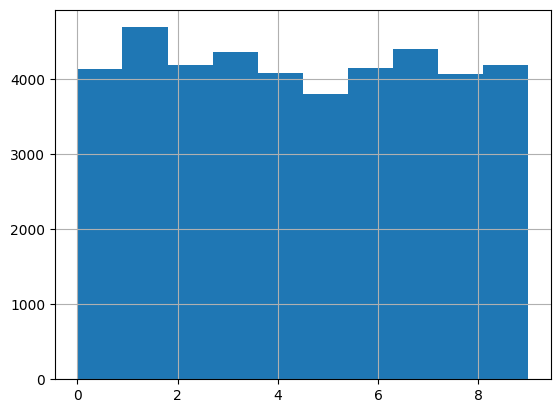

In [9]:
df['label'].hist()

In [10]:
# Obtener una sección del DataFrame usando los números de la columna
pixeles = df.iloc[:,1:785] # x
digitos = df.iloc[:,0:1] # y

In [12]:
# Separar datos para entrenar y para probar

X_train, X_test, Y_train, Y_test = train_test_split(
    pixeles,
    digitos,
    test_size=0.5
)

In [13]:
X_train.shape

(21000, 784)

In [14]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def mostrar_num(in_data):
    """Genera un gráfico que muestra un registro
    del set de datos.
    Para ello convierte el array de 1 dimensión en
    una matriz de 28*28
    """
    matriz = np.array(in_data.values)
    plt.imshow(matriz.reshape(28,28))

In [16]:
X_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


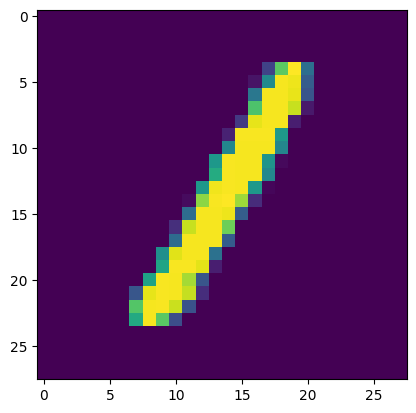

In [17]:
mostrar_num(X_test.iloc[3])

In [18]:
# Creacion del modelo
modelo = SVC(kernel= 'linear')

In [19]:
# Entrenamiento
hora_inicio = time()
modelo.fit(X_train.values, Y_train.values.ravel())
print('Entreenamientoterminado en: {} segundos'.format(time() - hora_inicio))

Entreenamientoterminado en: 16.130821704864502 segundos


In [20]:
# Crear predicción de datos
hora_inicio = time()
Y_pred = modelo.predict(X_test.values)
print ('Predicción terminada en: {} segundos'.format(time() - hora_inicio))
print (Y_pred.shape)

Predicción terminada en: 19.696062088012695 segundos
(21000,)


In [22]:
precision = accuracy_score(Y_test, Y_pred)
print(f'Precisión: {precision}')

Precisión: 0.9085714285714286
